In [1]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização gráfica
import matplotlib.pyplot as plt
import seaborn as sns

# Ferramentas para construção do modelo
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

# Criação e manipulação de CNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D,LeakyReLU
from tensorflow.keras.optimizers import RMSprop,Nadam,Adadelta
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

**Carregando os dados .csv**

In [2]:
# Carregando dados
extras = pd.read_csv('Dig-MNIST.csv')
sample_submission = pd.read_csv('sample_submission.csv')
teste = pd.read_csv('test.csv')
treino = pd.read_csv('train.csv')

**Verificando distribuição de cada número**

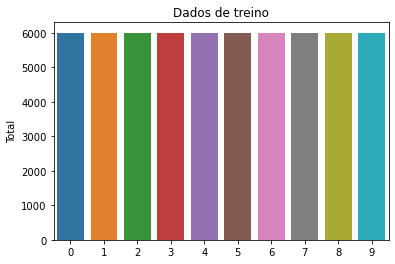

In [3]:
# Conta quantos itens tem de cada nos dados de treino
cont_treino = treino['label'].value_counts()

sns.barplot(cont_treino.index, cont_treino)
plt.ylabel('Total')
plt.title('Dados de treino')

plt.show()

**Representação do banco de dados**

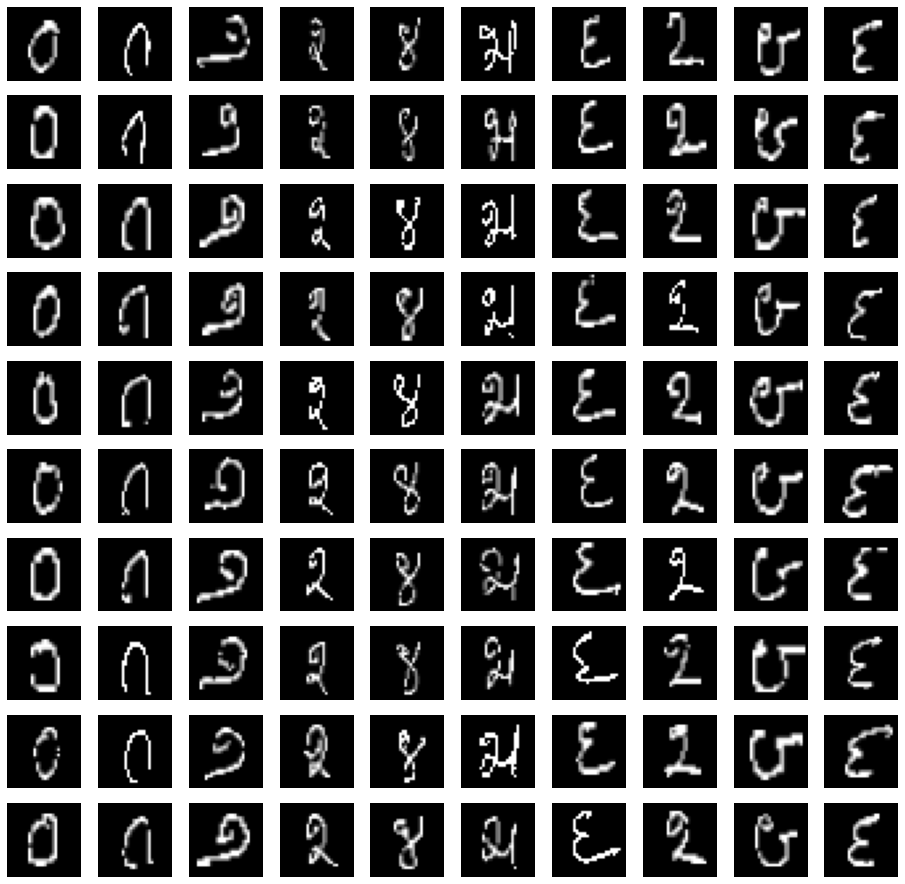

In [4]:
# Plota quadro com as primeiras 100 imagens
plt.figure(figsize=(16, 16))

for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(treino.iloc[i, 1:].values.reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    
plt.show()

## Preparação dos dados para implementação do modelo

**Normalização**

In [5]:
# Normalizando dados para escala 0-1
dados_x = treino.iloc[:, 1:].values.astype('float32')  # converte para float
dados_x = dados_x/255                                  # normaliza

# Separação dos rótulos
dados_y = treino['label']

In [6]:
# Dados de treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(dados_x, 
                                                        dados_y, 
                                                        random_state=0, 
                                                        test_size=0.2)

# Redimensionando dados
X_treino = X_treino.reshape(-1, 28, 28, 1)
X_teste = X_teste.reshape(-1, 28, 28, 1)

# Categorizando
Y_treino = to_categorical(Y_treino)
Y_teste = to_categorical(Y_teste)

In [7]:
# Declara rede neural
cnn = Sequential()

# Camada convolucional
cnn.add(Conv2D(filters=32,                 # número de filtros
               kernel_size=3,              # tamanho do filtro (3x3)
               activation='relu',          # função de ativação
               input_shape=(28, 28, 1),    # dimensão do objeto de entrada
               padding='same'))
cnn.add(MaxPooling2D(pool_size=2,          # tamanho do pool
                     strides=2))           # largura do passo de pooling

# Camada convolucional
cnn.add(Conv2D(filters=64, 
               kernel_size=3, 
               activation='relu', 
               padding='same'))
cnn.add(MaxPooling2D(pool_size=2, 
                     strides=2))

# Aplainamento
cnn.add(Flatten())

# Camada totalmente conectada (camada oculta)
cnn.add(Dense(units=128, 
              activation='relu'))

# Camada de saída
cnn.add(Dense(units=10, 
              activation='relu'))

In [9]:
# Visualizando a construção até agora da rede neural
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1